# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Skillfactory---Практический-Machine-Learning" data-toc-modified-id="Skillfactory---Практический-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Skillfactory - Практический Machine Learning</a></div><div class="lev2 toc-item"><a href="#15/02/2018---Методы-регрессии" data-toc-modified-id="15/02/2018---Методы-регрессии-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>15/02/2018 - Методы регрессии</a></div><div class="lev2 toc-item"><a href="#Функции-потерь" data-toc-modified-id="Функции-потерь-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Функции потерь</a></div><div class="lev1 toc-item"><a href="#Алгоритмы" data-toc-modified-id="Алгоритмы-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Алгоритмы</a></div><div class="lev2 toc-item"><a href="#Метод-ближайшего-соседа" data-toc-modified-id="Метод-ближайшего-соседа-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Метод ближайшего соседа</a></div><div class="lev2 toc-item"><a href="#Деревья-решений" data-toc-modified-id="Деревья-решений-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Деревья решений</a></div><div class="lev2 toc-item"><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Линейная регрессия</a></div><div class="lev3 toc-item"><a href="#Normal-Equation" data-toc-modified-id="Normal-Equation-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Normal Equation</a></div><div class="lev4 toc-item"><a href="#Задачка" data-toc-modified-id="Задачка-2311"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>Задачка</a></div><div class="lev3 toc-item"><a href="#Градиентный-спуск" data-toc-modified-id="Градиентный-спуск-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Градиентный спуск</a></div><div class="lev3 toc-item"><a href="#Природа-зависимости" data-toc-modified-id="Природа-зависимости-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Природа зависимости</a></div><div class="lev4 toc-item"><a href="#Пример" data-toc-modified-id="Пример-2331"><span class="toc-item-num">2.3.3.1&nbsp;&nbsp;</span>Пример</a></div><div class="lev2 toc-item"><a href="#Ладно,-давайте-дальше-в-sklearn-=)" data-toc-modified-id="Ладно,-давайте-дальше-в-sklearn-=)-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Ладно, давайте дальше в sklearn =)</a></div><div class="lev3 toc-item"><a href="#Переобучениенедообучение,-мультиколлинеарность-и-регуляризация" data-toc-modified-id="Переобучениенедообучение,-мультиколлинеарность-и-регуляризация-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Переобучение\недообучение, мультиколлинеарность и регуляризация</a></div><div class="lev2 toc-item"><a href="#Выбросы-в-данных" data-toc-modified-id="Выбросы-в-данных-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Выбросы в данных</a></div><div class="lev3 toc-item"><a href="#RANSAC-регрессия" data-toc-modified-id="RANSAC-регрессия-251"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>RANSAC регрессия</a></div><div class="lev3 toc-item"><a href="#Robust-Estimators" data-toc-modified-id="Robust-Estimators-252"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Robust Estimators</a></div><div class="lev3 toc-item"><a href="#Добавим-остальные-признаки-в-простую-модель-модель" data-toc-modified-id="Добавим-остальные-признаки-в-простую-модель-модель-253"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Добавим остальные признаки в простую модель модель</a></div>

# Skillfactory - Практический Machine Learning
## 15/02/2018 - Методы регрессии

<center> Шестаков Андрей </center>

В задаче классификации зависимой переменной $y$ была "метка класса" - по сути категориальная переменная (отдаст кредит или нет, выживет или нет, тип цветка). <br\>
В задаче регрессии зависимая переменная $y \in \mathbb{R}^n$ (стоимость квартиры, количество кликов на баннер, объемы покупок). <br\>

Схемы алгоритмов, по большей части, остаются прежними (с точностью до функции потерь).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import export_graphviz
from ipywidgets import interact, IntSlider
import subprocess

## Функции потерь

Пусть $y^{(i)}$ - значение целевой переменной для $i$-го объекта, а $\hat{y}^{(i)}=a(x^{(i)})$ - её оценка алгоритмом $a(x)$.Чаще всего качество регрессионных методов оценивается по следующим функциям потерь:

**1. (R)MSE ((Root) Mean Squared Error) - (Корень из) Среднеквадратичное отклонение**

$$ L(a, y) = \frac{1}{N}\sum\limits_i^N (y^{(i)} - \hat{y}^{(i)})^2$$

**2. MAE (Mean Absolute Error) - Среднее абсолютное отклонение**

$$ L(a, y) = \frac{1}{N}\sum\limits_i |y^{(i)} - \hat{y}^{(i)}|$$

**3. RSE (Relative Squared Error) - Относительное квадратичное отклонение**

$$ L(a, y) = \sqrt\frac{\sum\limits_i (y^{(i)} - \hat{y}^{(i)})^2}{\sum\limits_i (y^{(i)} - \bar{y})^2}$$

**4. RAE (Relative Absolute Error) - Относительное абсолютное отклонение (?)**

$$ L(a, y) = \frac{\sum\limits_i |y^{(i)} - \hat{y}^{(i)}|}{\sum\limits_i |y^{(i)} - \bar{y}|}$$

**5. RMSLE (Root Mean Squared Logarithmic Error) - (?!)**

$$ L(a, y) = \sqrt{\frac{1}{N}\sum\limits_i^N(\log(y^{(i)} + 1) - \log(\hat{y}^{(i)} + 1))^2}$$

**6. MAPE (Mean Absolute Persentage Error) - Среднее абсолютное отклонение в процентах **

$$ L(a, y) = \frac{100}{N} \sum\limits_i\left|\frac{ y^{(i)} - \hat{y}^{(i)}}{y^{(i)}}\right|$$


**7. Под предметную область **

* Стоимость заморозки средств, стоимость хранения товара и тп


** Вопросы **
* Как интерпретируются ошибки (3) и (4)?
* В чем особенность ошибки (5) и (6)?

(0, 10)

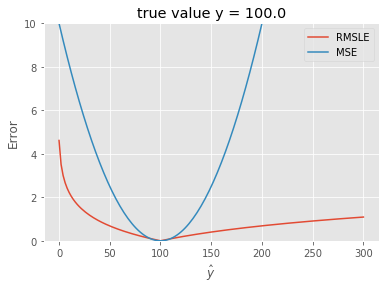

In [3]:
y = 100
y_hat = np.linspace(0, 300, 151)
# log error
error1 = np.sqrt((np.log(y+1) - np.log(y_hat + 1))**2)

# squared error
error2 = (y - y_hat)**2 /1000.

plt.plot(y_hat, error1, label='RMSLE')
plt.plot(y_hat, error2, label='MSE')
plt.xlabel('$\hat{y}$')
plt.ylabel('Error')
plt.title('true value y = %.1f' % y)
plt.legend()
plt.ylim(0, 10)

* Недопрогнозировать дороже, чем перепрогнозировать
* Учет эффекта масштаба

# Алгоритмы

## Метод ближайшего соседа

Метод минимально отличается от варианта с классификацией. <br\> По прежнему считаем меру "близости" между объектами, а затем усредняем значения целевого признака у *k* ближайших соседей.

Рассмотрим данные по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя ([обучение](http://bit.ly/1gIQs6C), [тест](http://bit.ly/IYPHrK)). 


In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

In [6]:
df_train = pd.read_csv('accord_sedan_training.csv')
df_test = pd.read_csv('accord_sedan_testing.csv')
df_train.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


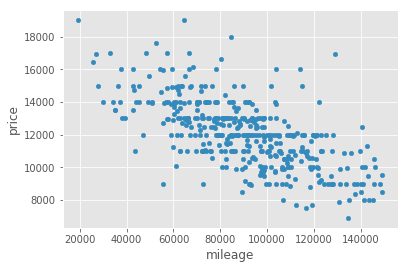

In [7]:
df_train.plot(y='price', x='mileage', kind='scatter')

Посмотроим регрессор на k ближайших соседей.

In [8]:
X_train = df_train.mileage.values.reshape(-1, 1)
y_train = df_train.price.values

X_test = df_test.mileage.values.reshape(-1, 1)
y_test = df_test.price.values

In [9]:
knn = KNeighborsRegressor(n_neighbors=10, weights='uniform', metric='manhattan')
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

Text(0,0.5,'price')

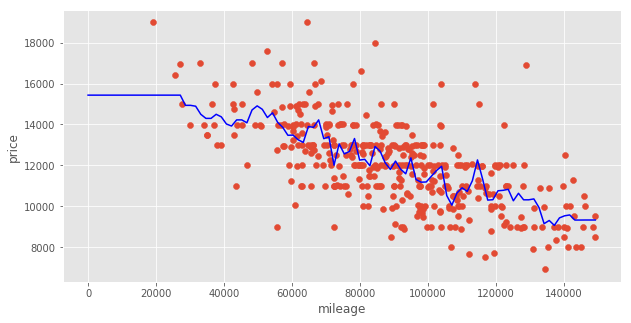

In [10]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = knn.predict(x)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='blue')
plt.xlabel('mileage')
plt.ylabel('price')

In [11]:
def plot_knn(k=5):
    knn = KNeighborsRegressor(n_neighbors=k, weights='uniform', metric='manhattan')
    knn.fit(X_train, y_train)
    
    X_train_s = np.sort(X_train, axis=0)
    y_hat = knn.predict(X_train_s.reshape(-1,1))
    plt.xlabel('mileage')
    plt.ylabel('price')

    
    plt.scatter(X_train, y_train, c='r', label='actual data')
    plt.plot(X_train_s, y_hat, c='b', label='knn, $k=%d$' % k)
    plt.legend(loc=2)
    
    return None

In [12]:
fig = interact(plot_knn, k=IntSlider(min=1, max=10, value=5))

interactive(children=(IntSlider(value=5, description='k', max=10, min=1), Output()), _dom_classes=('widget-interact',))

In [13]:
def regression_report(X_s, y_s, model, labels, score=mean_absolute_error):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
    ax = ax.flatten()

    colors = plt.cm.jet(np.linspace(0, 1, len(labels)))

    for idx, label in enumerate(labels):
        X = X_s[idx]
        y_true = y_s[idx]

        y_hat = model.predict(X)

        # Scatter
        ax[0].scatter(y_hat, y_true, color = colors[idx], alpha=0.3,
                      label='%s Score - %2.4f' % (label, score(y_true, y_hat)))

        # Resid
        resid = y_true - y_hat
        ax[1].scatter(resid, y_true, color = colors[idx], alpha=0.3, label=label)

        # Distr
        ax[2].hist(y_hat, alpha=0.5, label=label, color = colors[idx], normed=True)

        # Resid
        resid = y_true - y_hat
        ax[3].scatter(resid, y_hat, color = colors[idx], alpha=0.3, label=label)

    ax[0].legend(loc=4)
    ax[0].set_xlabel('$\hat{y}$')
    ax[0].set_ylabel('$y$')

    ax[1].legend(loc=2)
    ax[1].set_xlabel('$resid$')
    ax[1].set_ylabel('$y$')

    ax[2].legend(loc=2)
    ax[2].set_xlabel('$\hat{y}$')

    ax[3].legend(loc=2)
    ax[3].set_xlabel('$resid$')
    ax[3].set_ylabel('$\hat{y}$')

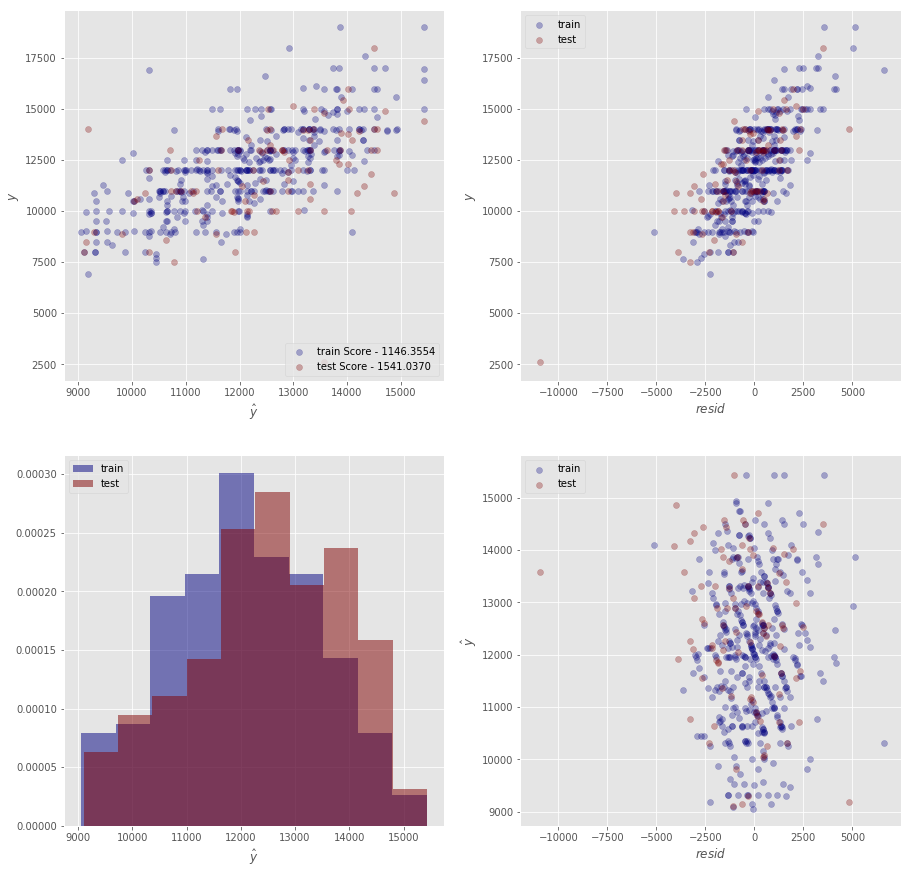

In [14]:
regression_report([X_train, X_test], [y_train, y_test], knn, 
                  ['train', 'test'], score=mean_absolute_error)

## Деревья решений

Напомним себе на основе чего строится дерево решений. В каждом новом узле выбирается признак и его значение, максимизирущее прирост информативности:
$$ Gain(S, A) = I(S) - \sum\limits_v\frac{|S_v|}{|S|}\cdot I(S_v),$$ где $A$ - это некий атрибут, а $v$ - его значения, I(A) - одна из мер неопределенности, например:
* Gini index $I(S) = 1 - \sum\limits_k (p_k)^2$
* Entropy  $I(S) = -\sum\limits_k p_k \log(p_k)$
* Missclassification error  $I(S) = 1 - \max\limits_k p_k$

Как видно, для того, чтобы посчитать $I(S)$ нам нужно знать пропорции классов $p_k$. Но у нас же задача регрессии!

В этом случае, можно считать мерой неопределенности разброс значений целевого признака `y` (среднюю квадратичную ошибку относительно среднего):
$$I(S) = \frac{1}{|S|} \sum\limits_{i \in S} (y_i - c)^2 $$ 
$$ c = \frac{1}{|S|}\sum\limits_{i \in S} y_i $$

или среднюю абсолютную ошибку относительно медианы

$$I(S) = \frac{1}{|S|} \sum\limits_{i \in S} |y_i - c| $$ 
$$ c = median(\{y_i\}) \ i \in S$$


Таким образом, дерево будет выбирать такие значение признаков из `X`, что разброс `y` будет наименьшим.  

In [ ]:
import subprocess
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

In [ ]:
tree = DecisionTreeRegressor(max_depth=2)

In [ ]:
tree.fit(X_train, y_train)

In [ ]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = tree.predict(x)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='blue')
plt.xlabel('mileage')
plt.ylabel('price')

In [ ]:
def plot_dec_reg(depth=1, criterion='mse', ):
    
    fig, ax = plt.subplots(1,2)
    fig.set_figwidth(20)
    
    X_train_s = np.sort(X_train, axis=0)
    
    tree = DecisionTreeRegressor(criterion=criterion, max_depth=depth)
    tree.fit(X_train, y_train)
    y_hat = tree.predict(X_train_s.reshape(-1,1))
    ax[1].set_xlabel('mileage')
    ax[1].set_ylabel('price')
    ax[1].scatter(X_train, y_train, label='actual data')
    ax[1].plot(X_train_s, y_hat, c='blue', label='decision tree \nregression')
    ax[1].legend(loc=2)
    
    try:
        with open('tree.dot', 'w') as fout:
            export_graphviz(tree, out_file=fout, feature_names=['mileage'])
        command = ["dot", "-Tpng", "tree.dot", "-o", "tree.png"]
        subprocess.check_call(command)
        ax[0].imshow(plt.imread('tree.png'))
        ax[0].axis("off")
    except:
        pass
    
    plt.show()

In [ ]:
fig = interact(plot_dec_reg, depth=IntSlider(min=1, max=5, value=1), criterion=['mse', 'mae'])


Обратите внимание на предсказание дерева. Что с ним не так и как с бы вы предложили с этим бороться?

## Линейная регрессия

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$
То есть необходимо оценить коэффициенты $\beta_i$.

В случае линейной регрессии коэффициенты $\beta_i$ рассчитываются так, чтобы минимизировать сумму квадратов ошибок по всем наблюдениям:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Несколько способов решения этой задачи:
* Градиентный спуск 
* Normal Equations (Проекционные матрицы)

### Normal Equation

Если система $$ A x = b $$ не имеет решения, то решайте $$A^\top A x = A^\top b$$
Отсюда получаем $$x = (A^\top A)^{-1} A^\top b$$

Такое же выражение для коэффициентов можно получить через матричное дифференцирование функции потерь

#### Задачка

Загрузите tutorial_dataset.csv или tutorial_dataset_2.csv в матрицу (таблицу) D. Присвойте y = D[:,0] а X = D[:, 1:].

Оцените коэффициенты линейной регрессии $\hat{y} = X\hat{\beta}$, где

$$ \hat{\beta} = (X^\top X)^{-1} X^\top y $$
Остатки модели рассчитываются как
$$ \text{res} = y - \hat{y} $$

3. Постройте два графика: 
    1. Выберите какой-нибудь признак (кроме x0) и на одном графике изобразите зависимость y~x и линию регрессии
    2. Постройте график  $\hat{y}$~остатки

In [ ]:
df = pd.read_csv('tutorial_dataset_2.csv')

In [ ]:
## Your Code Here

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_hat, res, marker='+')

### Градиентный спуск

$$ L(\beta_0, \beta_1) = \frac{1}{2n}\sum_{i=1}^n(\beta_0 + \beta_1x_1^{(i)} - y^{(i)})^2$$ 

* Предположим мы выбрали какое-то начальное приближение $(\hat{\beta_0}, \hat{\beta_1})$
* Его можно постараться улучшить - надо двигаться в сторону наискорейшего убывания функции (Антиградиента!)

<center><img src='img/dir-der.gif'></center>

Пусть уравнение регрессии имеет вид $\hat{y} = \beta_0 + \beta_1x$

Функция потерь $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1- y^{(i)})^2 $$

Посчитаем, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

Таким образом шаги алгоритма следующие:

* Задаем случайное начальное значение для $\beta$
* Пока не будет достигнуто правило останова:
    * Считаем ошибку и значение функции потерь
    * Считаем градиент
    * Обновляем коэффициенты

Выборку придется отнормировать для сходимости метода

In [ ]:
X_train = (X_train - X_train.mean())/X_train.std()

In [ ]:
# Просто для удобства
X_model = np.c_[np.ones(X_train.shape), X_train]
X_model.shape

In [ ]:
X_model[:10]

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
beta0 = np.linspace(11000 , 13000, 100)
beta1 = np.linspace(-2450, -250, 100)

B0, B1= np.meshgrid(beta0, beta1)

B_all = np.c_[B0.reshape(-1,1), B1.reshape(-1,1)].T

L = X_model.dot(B_all) - y_train.reshape(-1,1)
L = L ** 2
L = L.mean(axis=0)/2
L = L.reshape(B0.shape)


fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(40, 25)
ax.plot_surface(B0, B1, L, alpha=0.3,)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')

ax = fig.add_subplot(1, 2, 2)
contour = ax.contour(B0, B1, L)
plt.clabel(contour, inline=1, fontsize=10)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')

In [ ]:
def gradient_descent(X, y, iters, alpha):
    
    costs = []
    betas = []
    
    n = y.shape[0] 
    Beta = np.random.rand(X.shape[1])
    for i in xrange(iters):
        y_hat = X.dot(Beta)
        
        # Ошибка и остатки
        
        # Градиент

        # Обновление весов
        Beta = Beta - (alpha/n)*grad
        betas.append(Beta)
                    
    return Beta, costs, betas

In [ ]:
Beta, costs, betas = gradient_descent(X_model, y_train, 100, 0.05)

In [ ]:
beta0 = np.linspace(11000 , 13000, 100)
beta1 = np.linspace(-2450, -250, 100)

B0, B1= np.meshgrid(beta0, beta1)

B_all = np.c_[B0.reshape(-1,1), B1.reshape(-1,1)].T

L = X_model.dot(B_all) - y_train.reshape(-1,1)
L = L ** 2
L = L.mean(axis=0)/2
L = L.reshape(B0.shape)

fig, ax = plt.subplots(1,1)
contour = ax.contour(B0, B1, L)
plt.clabel(contour, inline=1, fontsize=10)
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')

betas = np.array(betas)
ax.plot(betas[:,0], betas[:,1], marker='*')


У градиентного спуска есть множество модификаций связанных. Некоторые улучшают процесс сходимости (градиент с импульсом), другие оптимизируют работу на больших выборках (стохастический градиентный спуск).

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e"><img src='http://sebastianruder.com/content/images/2016/09/contours_evaluation_optimizers.gif'></th>
    <th class="tg-031e"><img src='http://sebastianruder.com/content/images/2016/09/saddle_point_evaluation_optimizers.gif'></th>
  </tr>
</table>

[Обзор методов 1](http://sebastianruder.com/optimizing-gradient-descent/), [обзор методов 2](https://medium.com/towards-data-science/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f)

Конечно же в sklearn [имплементирован](http://scikit-learn.org/stable/modules/sgd.html) стохастический градиентный спуск с большим выбором параметов.

Стохастический градиентный достаточно гибок в использовании: 
* Его можно просто дообучать на новых данных (место того, чтобы строить новую модель с 0)
* Можно оптимизировать более сложные функции потерь
* Можно обучать на данных, которые не влезают в память

По поводу последнего, конечно же лучше использовать специализированный софт, например [Vowpal Wabbit](https://github.com/JohnLangford/vowpal_wabbit/wiki/Input-format). Да, придется писать в командной строке и записывать данные в специальном формате, но поверьте, это того стоит [(пример)](https://habrahabr.ru/company/mlclass/blog/248779/).

### Природа зависимости

Далеко не всегда переменные зависят друг от друга именно в том виде, в котором они даны. Никто не запрещает зависимость вида
$$\log(y) = \beta_0 + \beta_1\log(x_1)$$
или
$$y = \beta_0 + \beta_1\frac{1}{x_1}$$
или
$$y = \beta_0 + \beta_1\log(x_1)$$
или
$$y = \beta_0 + \beta_1 x_1^2 + \beta_2 x_2^2 + \beta_3 x_1x_2 $$
и т.д.

Не смотря на то, что могут возникать какие-то нелинейные функции - всё это сводится к **линейной** регрессии (например, о втором пункте, произведите замену $z_1 = \frac{1}{x_1}$)

#### Пример

Загрузите данные `weights.csv` c информацией о весах мозга и тел различных биологических видов. Вес тела задан в килограммах, вес могза в граммах.

In [ ]:
df = pd.read_csv('weights.csv', sep=';', index_col=0)
df.head()

In [ ]:
df.plot(x = 'body_w', y='brain_w', kind='scatter')
for k, v in df.iterrows():
    plt.annotate(k, v[:2])
# Должно получится что-то несуразное..

Теперь давайте возьмем логарифм от обеих переменных и снова нарисуем их на графике

In [ ]:
df['log_body_w'] = np.log(df.body_w)
df['log_brain_w'] = np.log(df.brain_w)
df.plot(x = 'log_body_w', y='log_brain_w', kind='scatter')
for k, v in df.iterrows():
    plt.annotate(k, v[2:])

## Ладно, давайте дальше в sklearn =)

In [ ]:
X_train = df_train.mileage.values.reshape(-1, 1)
y_train = df_train.price.values

In [ ]:
from sklearn.linear_model import LinearRegression

Обучим модель

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
print 'Model:\nprice = %.2f + (%.2f)*mileage' % (model.intercept_, model.coef_[0])

In [ ]:
model.intercept_

In [ ]:
model.coef_

Нарисуем решение

In [ ]:
df_train.plot(x='mileage', y='price', kind='scatter', s=120)

## Your Code Here

### Переобучение\недообучение, мультиколлинеарность и регуляризация

Одна из важнейших характеристик моделей, будь то линейная регрессия, наивные Байес и др. - их **обобщающая способность**.
Наша задача не построить "идеальную" модель, на имеющихся у нас наблюдениях, которая идеально их будет предсказывать, но и применять эту модель для новых данных.

Ниже приводятся примеры 3х моделей.

<img src=http://www.holehouse.org/mlclass/10_Advice_for_applying_machine_learning_files/Image%20%5B8%5D.png>
[Andrew's Ng Machine Learning Class - Stanford]

Второй момент, который важен для линейных моделей - **мультиколлинеарность**. Этот эффект возникает, когда пара предикторов  близка к взаимной линейной зависимости (коэффициент корреляции по модулю близок к 1). Из-за этого:

* Матрица $X^{\top} X$ становится плохо обусловленной и необратимой
* Зависимость $y = \beta_0 + \beta_1x_1 + \beta_2x_2$ перестаёт быть одназначной

С этим эффектом можно бороться несколькими способами

* Последовательно добавлять переменные в модель
* Исключать коррелируемые предикторы

В обоих случаях может помочь **регуляризация** - добавление штрафного слагаемого за сложность модели в функцию потерь. В случае линейной регрессии было:
$$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 $$
Стало (Ridge Regularization)
$$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\left[ \sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 \right] + \lambda\sum_{j=1}^{m}\beta_j^2$$
или (Lasso Regularization)
$$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\left[ \sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 \right] + \lambda\sum_{j=1}^{m}|\beta_j|$$

<center><img src='img/regul.jpg'></center>

## Выбросы в данных

Квадратичная ошибка достаточно чувствительна к выбросам. Давайте вернемся к нашим данным про автомобили и добавим туда выбросы.

Посмотрим, как поведет себя простая линейная регрессия.

In [ ]:
df_train = pd.read_csv('http://bit.ly/1gIQs6C')

In [ ]:
df_train.describe()

In [ ]:
X_train = df_train.mileage.values.reshape(-1, 1)
y_train = df_train.price.values

n = y_train.shape[0]

Добавляем выброс(-ы)

In [ ]:
X_train = np.r_[X_train, [[250000+np.random.rand()*10000]]]
y_train = np.r_[y_train, 16000+np.random.randn()*1000]

In [ ]:
plt.scatter(X_train, y_train)

 Обучим 2 модели. Первая - на данных без выбросов. Вторая - на всех данных

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train[:n], y_train[:n])

model_ouliers = LinearRegression(fit_intercept=True)
model_ouliers.fit(X_train, y_train)

In [ ]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = model.predict(x)
y_hat_outliers = model_ouliers.predict(x)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='red')
ax.plot(x, y_hat_outliers, c='green')

### RANSAC регрессия

Идея метода RANdom SAmple Consensus (RANSAC) заключается в многократном обучении модели на случайном наборе точек из исходных данных с последующим выбором лучшей модели.

То есть:
* Задаем функцию потерь
* Задаем порог $\theta$ для остатков при котором наблюдения начинают относится к выбросам
* Задаем правило останова

Шаги алгоритма следующие
1. Взять случайные K точек и обучить на них модель M
2. Сравнить ошибки на остальных точких с порогом $\theta$ и отнести к выбросам или внутренним точкам
3. Обучить модель на всех внутренних точках, оценить качество на внутренних точках
4. Повторить 1-3 пока не наступит правило останова. 
5. Вывод: модель с лучшим качеством

In [ ]:
from sklearn.linear_model import RANSACRegressor

In [ ]:
model_ransac = RANSACRegressor(LinearRegression())
model_ransac.fit(X_train, y_train)

In [ ]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = model_ransac.predict(x)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='red')
ax.plot(x, y_hat_outliers, c='green')

### Robust Estimators

Идея робастных методов заключается во взвешивании остатков модели таким образом, чтобы большие значения вносили меньший вклад в оценку параметров.

Таким образом, вместо минимизации квадрата остатков $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2$$
Будут минимизироваться взвешенные остатки $$ L_w(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}\rho_i \cdot (\hat{y}^{(i)} - y^{(i)})^2,$$
где $\rho_i$ - некоторый вес

Для того, чтобы попробовать эти методы нужно будет устновить пакет `statsmodels` через `pip`

In [ ]:
import statsmodels.api as sm

In [ ]:
c = 4.685
support = np.linspace(-3*c, 3*c, 1000)
tukey = sm.robust.norms.TukeyBiweight(c=c)
plt.plot(support, tukey(support))
plt.ylim(.1, -4.1)

Полный список взвешивающих функций в модуле `statsmodels` можно найти [тут](http://statsmodels.sourceforge.net/stable/examples/notebook/generated/robust_models_1.html)

In [ ]:
model_robust = sm.RLM(y_train, sm.add_constant(X_train), M=sm.robust.norms.TukeyBiweight())
model_robust = model_robust.fit()

In [ ]:
model_robust.summary()

In [ ]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = model_robust.predict(sm.add_constant(x))

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='red')
ax.plot(x, y_hat_outliers, c='green')

### Добавим остальные признаки в простую модель модель